In [1]:
import sys
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline  

# Brian Function Simulation

From the paper I read this week, they use Brian function as testing function for global optimization problem. As you can observe from contour map above, we have 3 global minimum and no local minimum. 

In [54]:
# Numerical decisions
N = 1000
x1 = np.linspace(-5, 10, N, endpoint=True)
x2 = np.linspace(0, 15, N, endpoint=True)

def Brainfunction(x2,x1):
    # Parameters of the function
    PI = 3.14159265359
    a = 1;
    b = 5.1/(4*pow(PI,2));
    c = 5/PI;
    r = 6;
    s = 10;
    t = 1/(8*PI);
    f = a*(x2 - b*x1**2 + c*x1 -r)**2 + s*(1-t)*np.cos(x1) + s
    return f*(-1)

In [3]:
sns.set(context="notebook", style="dark",
        rc={"axes.axisbelow": False})
def contourFunction(X, Y, Z, nbins=50):
    levels=mpl.ticker.MaxNLocator(nbins=nbins).tick_values(Z.min(),Z.max())
    plt.figure(figsize=(20,20))

    plt.subplot(2,1,1)
    plt.contourf(x1,x2,Z,levels=levels ,zorder=0,cmap=plt.get_cmap('rainbow_r'))
    plt.colorbar()

    plt.subplot(2,1,2)
    cp = plt.contour(X, Y, Z,levels=levels,cmap=plt.get_cmap('rainbow_r'))
    plt.clabel(cp, inline=True, fontsize=20)
    plt.colorbar()
    plt.grid('on')
    plt.title('Brinan Function Contour plot')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

Brian Function

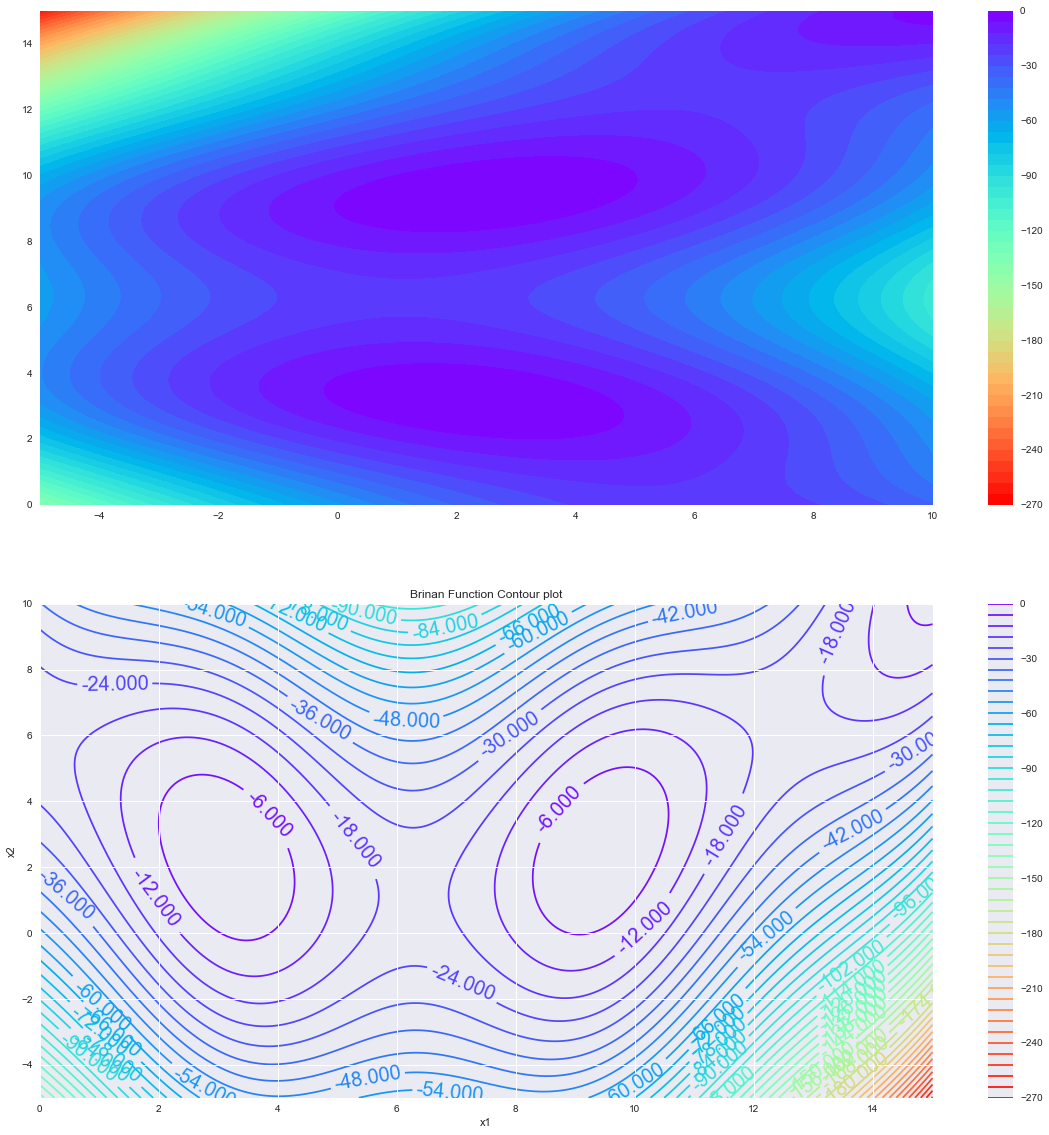

In [140]:
X,Y = np.meshgrid(x1,x2)
Z = Brainfunction(Y,X)
printmd('Brian Function')
contourFunction(Y,X,Z,50)

# Bayesian Simulation

In [233]:
!pip install bayesian-optimization

## Initial knowledge and visualization

In [89]:
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
a.flatten().reshape(4,4)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [7]:
def posterior(bo, x):
    # Fit gaussian process
    bo.gp.fit(bo.X, bo.Y)
    # Create predict value
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

In [151]:
a=[1,2,3,4,5]
a[-2:]

[4, 5]

In [143]:
def plot_gp(bo, x, y,nbins=50):
    
    fig = plt.figure(figsize=(20, 20))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 2)
    axTar = plt.subplot(gs[0, 0])
    axPre = plt.subplot(gs[0, 1])
    acq = plt.subplot(gs[1,1])
    
    mu, sigma = posterior(bo, x)

    # Target
    size = int(np.sqrt(len(x[:,0])))
    levels=mpl.ticker.MaxNLocator(nbins=nbins).tick_values(y.min(),y.max())
    
    cp = axTar.contour(x[:,0].reshape(size,size), x[:,1].reshape(size,size), y, 
                       levels=levels,cmap=plt.get_cmap('rainbow_r'))
    plt.clabel(cp, inline=True, fontsize=10)
     
    # Prediction
    cp = axPre.contour(x[:,0].reshape(size, size), x[:,1].reshape(size, size), mu.reshape(size, size) 
                  , levels=levels, cmap=plt.get_cmap('rainbow_r'))
    plt.clabel(cp, inline=True, fontsize=10)
    # PLOT SAMPLE POINT
    axPre.plot(bo.X[:,0][0:-2], bo.X[:,1][, 'D', markersize=6, label=u'Observations', color='r')
   
    # Utility Map
    utility = bo.util.utility(x, bo.gp, 0)
    levels=mpl.ticker.MaxNLocator(nbins=10).tick_values(utility.min(),utility.max())
    cp = acq.contour(x[:,0].reshape(size, size), x[:,1].reshape(size, size), utility.reshape(size, size), 
                label='Utility Function', levels=levels, cmap=plt.get_cmap('rainbow'))
    plt.clabel(cp, inline=True, fontsize=10)
    
    # Next sample Point 
    maxUtilityPoint = x[np.argmax(utility)]
    acq.plot(maxUtilityPoint[0], maxUtilityPoint[1], '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    
    axPre.legend(loc=1, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=1, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    plt.show()

In [144]:
X1sample = X.flatten()
X2sample = Y.flatten()
Z = Brainfunction(Y,X)
Xsample = np.concatenate(([X2sample],[X1sample]),axis=0).T

Initialization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 
    1 | 00m00s |   -0.82648 |   -3.0385 |   12.6432 | 
    2 | 00m00s |  -53.30780 |    6.3619 |    6.9115 | 
    3 | 00m00s |  -48.40252 |    0.3376 |   10.8943 | 
    4 | 00m00s |  -11.20033 |   -2.2215 |    7.5243 | 
    5 | 00m00s |   -5.88399 |    3.1541 |    4.6073 | 
    6 | 00m00s |  -44.72248 |    4.7714 |    7.1914 | 
    7 | 00m00s |  -45.61983 |    0.3178 |   10.6549 | 
    8 | 00m00s | -143.79897 |    6.6532 |   12.3029 | 
    9 | 00m00s |  -54.43051 |    5.6366 |    7.1970 | 
   10 | 00m00s |  -11.92816 |   -3.9277 |   11.2923 | 
   11 | 00m00s |   -2.07161 |    2.5891 |    3.2405 | 
   12 | 00m00s |  -14.24412 |    1.2005 |    3.3982 | 
   13 | 00m00s |  -29.88721 |   -1.8954 |   14.2712 | 
   14 | 00m00s |   -6.82410 |    4.3494 |    2.0044 | 
   15 | 00m00s |  -91.52706 |   -3.3511 |    3.2491 | 
   16 | 00m00s |  -20.81845 |    0.6635 |    3.1972

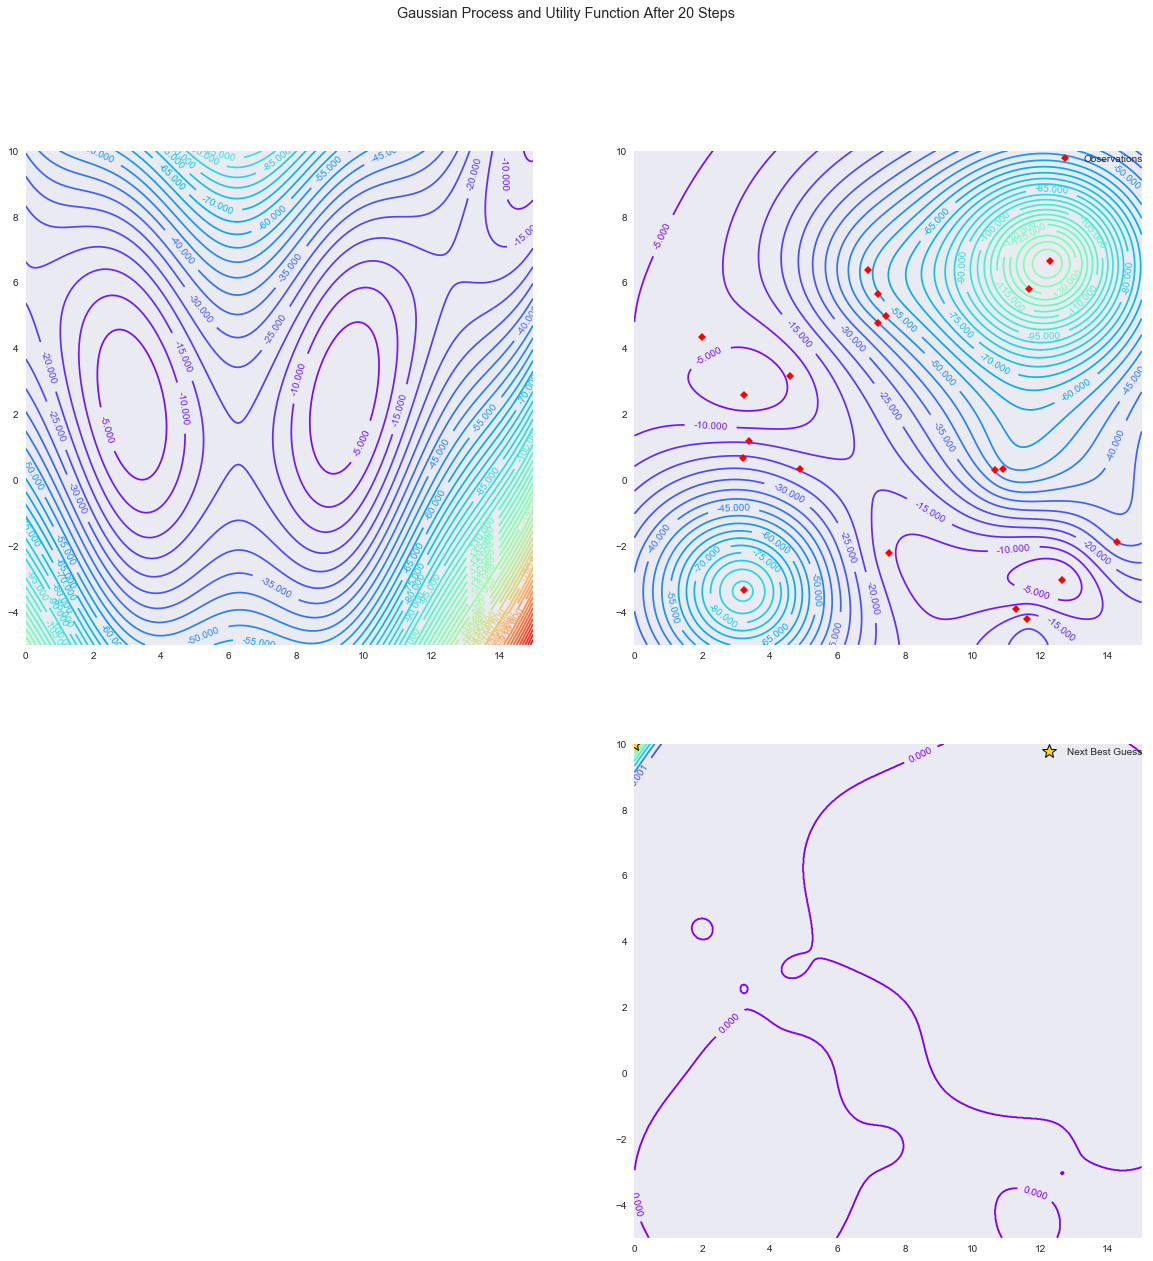

In [145]:
from bayes_opt import BayesianOptimization
bo = BayesianOptimization(Brainfunction, {'x1': (-5, 10), 'x2': (0,15)})
bo.maximize(init_points=20, n_iter=0, acq='ei')
plot_gp(bo,Xsample,Z,60,init=True)

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 


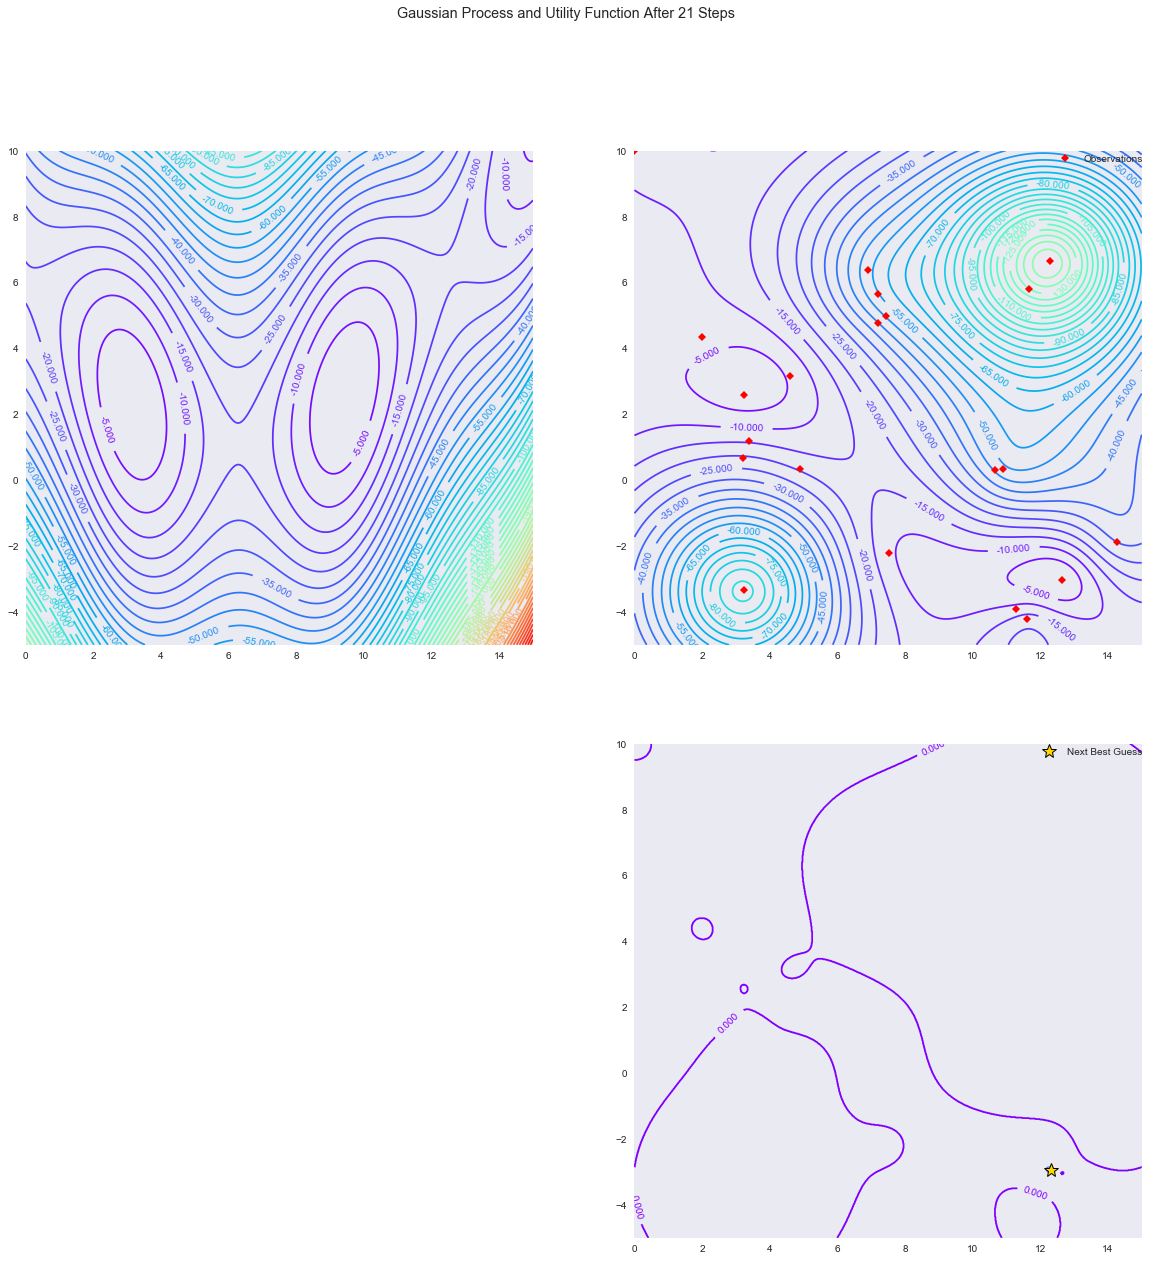

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 


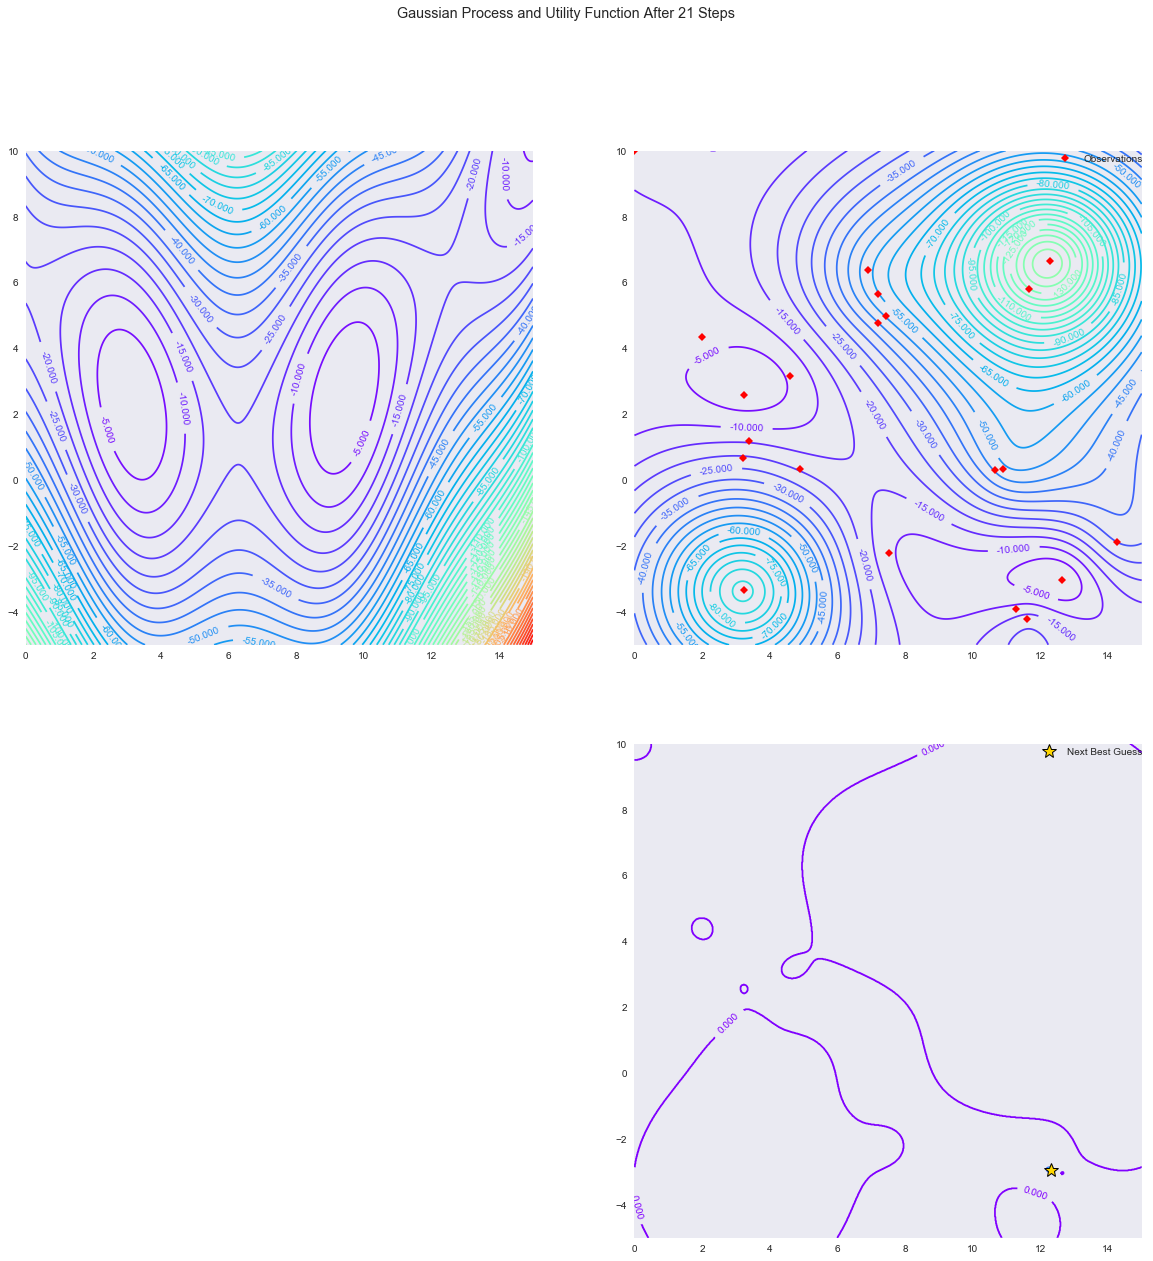

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 


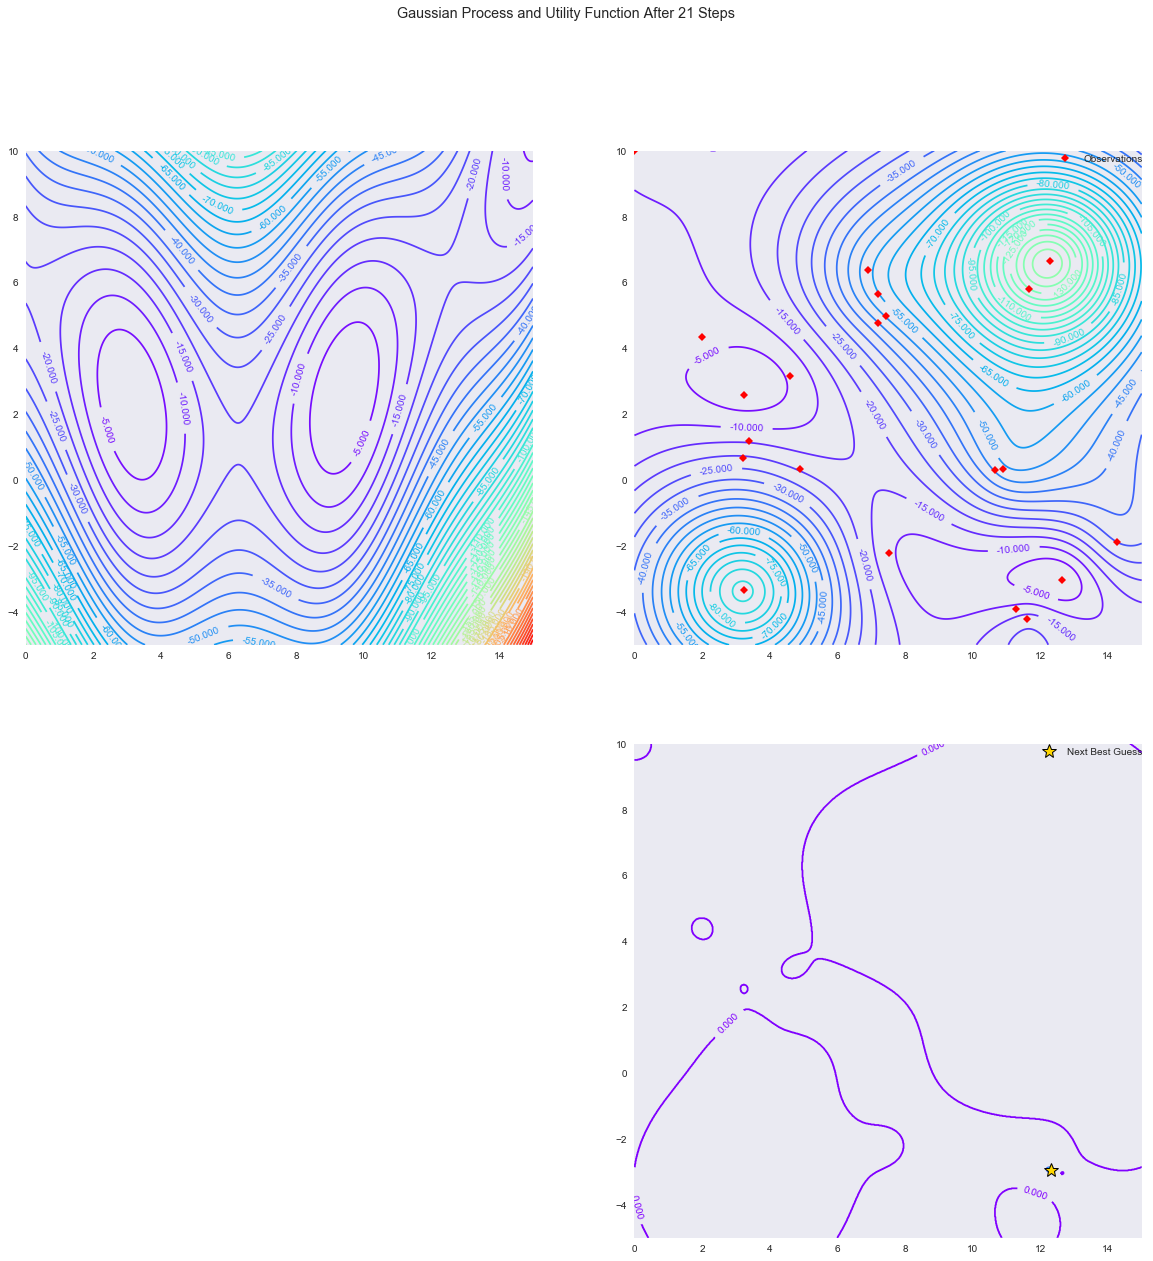

Bayesian Optimization
-----------------------------------------------------
 Step |   Time |      Value |        x1 |        x2 | 


KeyboardInterrupt: 

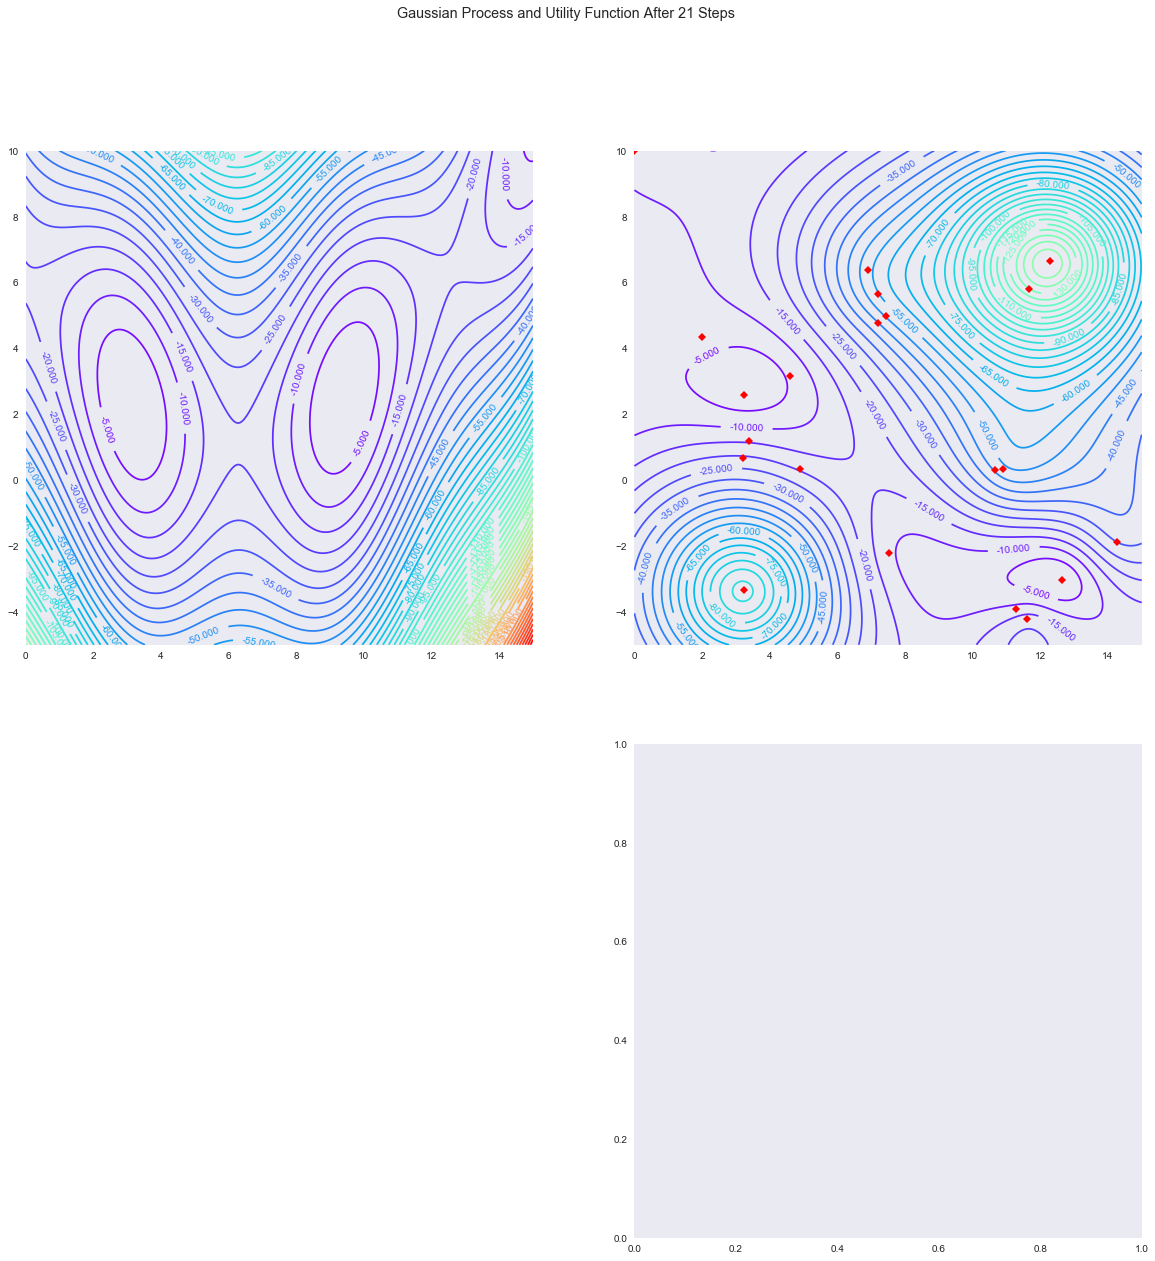

In [147]:
for i in range(50):
    bo.maximize(init_points=0, n_iter=2, acq='ei')
    plot_gp(bo,Xsample,Z,60)